In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'] High asset correllation per sector
tickers = ['MSFT', 'JNJ', 'PG', 'AGG', 'GLD']

In [3]:
benchmark = '^GSPC'

In [4]:
start_date = '2020-01-01'

In [5]:
num_portfolios = 25000

In [6]:
data = yf.download(tickers, start=start_date, interval='1d')['Close']
print(data.info())
benchmark_data = yf.download(benchmark, start=start_date, interval='1d')['Close']

C:\Users\iwtlf\AppData\Local\Temp\ipykernel_22744\3854480574.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, interval='1d')['Close']
[*********************100%***********************]  5 of 5 completed
C:\Users\iwtlf\AppData\Local\Temp\ipykernel_22744\3854480574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(benchmark, start=start_date, interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399 entries, 2020-01-02 to 2025-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGG     1399 non-null   float64
 1   GLD     1399 non-null   float64
 2   JNJ     1399 non-null   float64
 3   MSFT    1399 non-null   float64
 4   PG      1399 non-null   float64
dtypes: float64(5)
memory usage: 65.6 KB
None


In [7]:
returns = data.pct_change().dropna()
print(returns.info())
benchmark_returns = benchmark_data.pct_change().dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1398 entries, 2020-01-03 to 2025-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGG     1398 non-null   float64
 1   GLD     1398 non-null   float64
 2   JNJ     1398 non-null   float64
 3   MSFT    1398 non-null   float64
 4   PG      1398 non-null   float64
dtypes: float64(5)
memory usage: 65.5 KB
None


In [8]:
returns.head()

Ticker,AGG,GLD,JNJ,MSFT,PG
Date,,,,,
2020-01-03,0.002929,0.013269,-0.011578,-0.012452,-0.006726
2020-01-06,-0.000797,0.010490,-0.001247,0.002585,0.001387
2020-01-07,-0.001063,0.003935,0.006107,-0.009118,-0.006192
2020-01-08,-0.001152,-0.007502,-0.000138,0.015928,0.004263
2020-01-09,0.001064,-0.005652,0.002966,0.012493,0.010938


In [9]:
benchmark_returns.head()

Ticker,^GSPC
Date,
2020-01-03,-0.007060
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
2020-01-09,0.006655


In [10]:
portfolio_results = []

In [11]:
cov_matrix = returns.cov() * 252 # trading days per year

In [12]:
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    portfolio_results.append([portfolio_return, portfolio_volatility, sharpe_ratio, weights])


In [13]:
results_df = pd.DataFrame(portfolio_results, columns=['Return', 'Volatility', 'Sharpe', 'Weights'])
results_df

,Return,Volatility,Sharpe,Weights
0,0.143203,0.183409,0.780785,"[0.04147863764651803, 0.017173455588277722, 0...."
1,0.128837,0.137610,0.936243,"[0.23668985579321827, 0.1360741003163419, 0.23..."
2,0.141285,0.149035,0.948001,"[0.10711563895844213, 0.18155526309564765, 0.3..."
3,0.080014,0.093426,0.856447,"[0.3465398247804426, 0.33494518304538906, 0.09..."
4,0.096117,0.124229,0.773714,"[0.2978627902215791, 0.0701458737679863, 0.178..."
...,...,...,...,...
24995,0.093747,0.119111,0.787057,"[0.3078379640661357, 0.08755193942536758, 0.32..."
24996,0.087084,0.122969,0.708178,"[0.22428346829197224, 0.13151895555987156, 0.2..."
24997,0.122502,0.128879,0.950514,"[0.16299027784056536, 0.21958061672746937, 0.1..."
24998,0.150857,0.169835,0.888255,"[0.07972125848919215, 0.10198009198085531, 0.3..."


In [14]:
max_sharpe_portfolio = results_df.loc[results_df['Sharpe'].idxmax()]
max_sharpe_portfolio

Return                                                 0.176941
Volatility                                             0.145813
Sharpe                                                 1.213483
Weights       [0.014333927631663839, 0.6480091291023634, 0.0...
Name: 17309, dtype: object

In [15]:
min_vol_portfolio = results_df.loc[results_df['Volatility'].idxmin()]
min_vol_portfolio

Return                                                 0.035153
Volatility                                             0.067556
Sharpe                                                 0.520353
Weights       [0.7825919067868219, 0.07704009350890924, 0.02...
Name: 3517, dtype: object

In [16]:
print("--- Max Sharpe Ratio Portfolio ---")
print(f"Annualized Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {max_sharpe_portfolio['Volatility']:.2%}")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe']:.2f}")
print("Optimal Weights:")
for ticker, weight in zip(tickers, max_sharpe_portfolio['Weights']):
    print(f"  {ticker}: {weight:.2%}")

--- Max Sharpe Ratio Portfolio ---
Annualized Return: 17.69%
Annualized Volatility: 14.58%
Sharpe Ratio: 1.21
Optimal Weights:
  MSFT: 1.43%
  JNJ: 64.80%
  PG: 2.55%
  AGG: 29.27%
  GLD: 1.94%


In [17]:
plt.style.use('seaborn-v0_8-darkgrid')

In [18]:
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

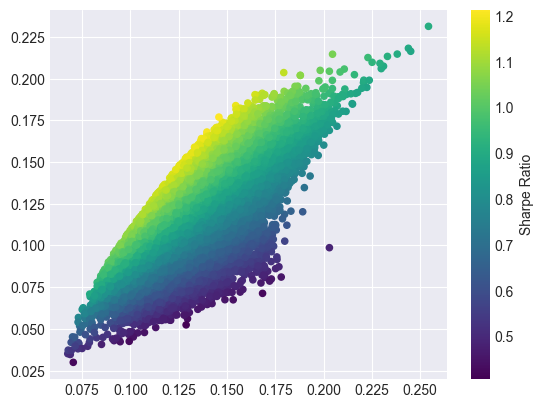

In [19]:
scatter = plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis', s=20)
plt.colorbar(scatter, label='Sharpe Ratio')

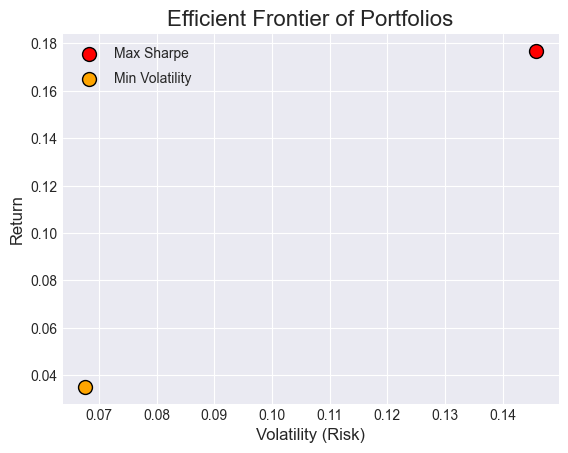

In [20]:
plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], c='red', s=100, edgecolors='black', label='Max Sharpe')
plt.scatter(min_vol_portfolio['Volatility'], min_vol_portfolio['Return'], c='orange', s=100, edgecolors='black', label='Min Volatility')
plt.title('Efficient Frontier of Portfolios', fontsize=16)
plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.legend(labelspacing=0.8)
plt.savefig('efficient_frontier.png')
plt.show()

In [21]:
optimal_weights = max_sharpe_portfolio['Weights']
portfolio_returns = (returns * optimal_weights).sum(axis=1)

In [22]:
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() - 1


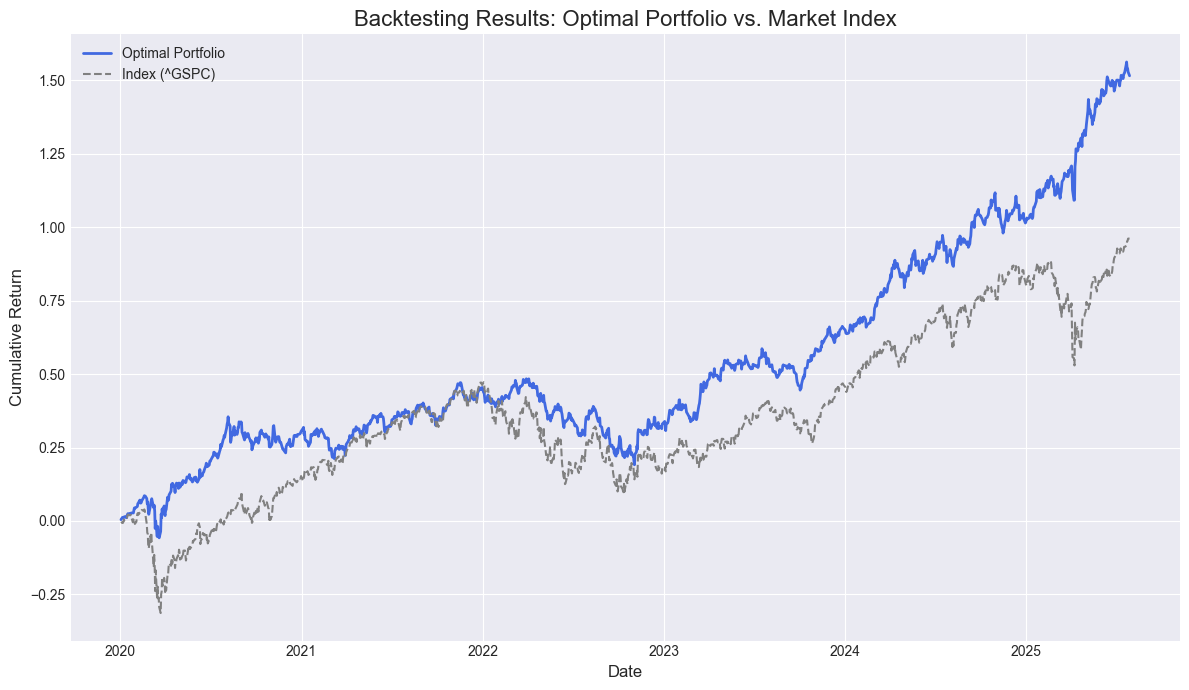

In [23]:
plt.figure(figsize=(12, 7))
plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label='Optimal Portfolio', color='royalblue', linewidth=2)
plt.plot(cumulative_benchmark_returns.index, cumulative_benchmark_returns, label=f'Index ({benchmark})', color='gray', linestyle='--')
plt.title('Backtesting Results: Optimal Portfolio vs. Market Index', fontsize=16)
plt.ylabel('Cumulative Return', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('backtesting_results.png')
plt.show()

C:\Users\iwtlf\AppData\Local\Temp\ipykernel_22744\3407352938.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data = yf.download(all_tickers, start=start_date, interval='1d')
[*********************100%***********************]  6 of 6 completed


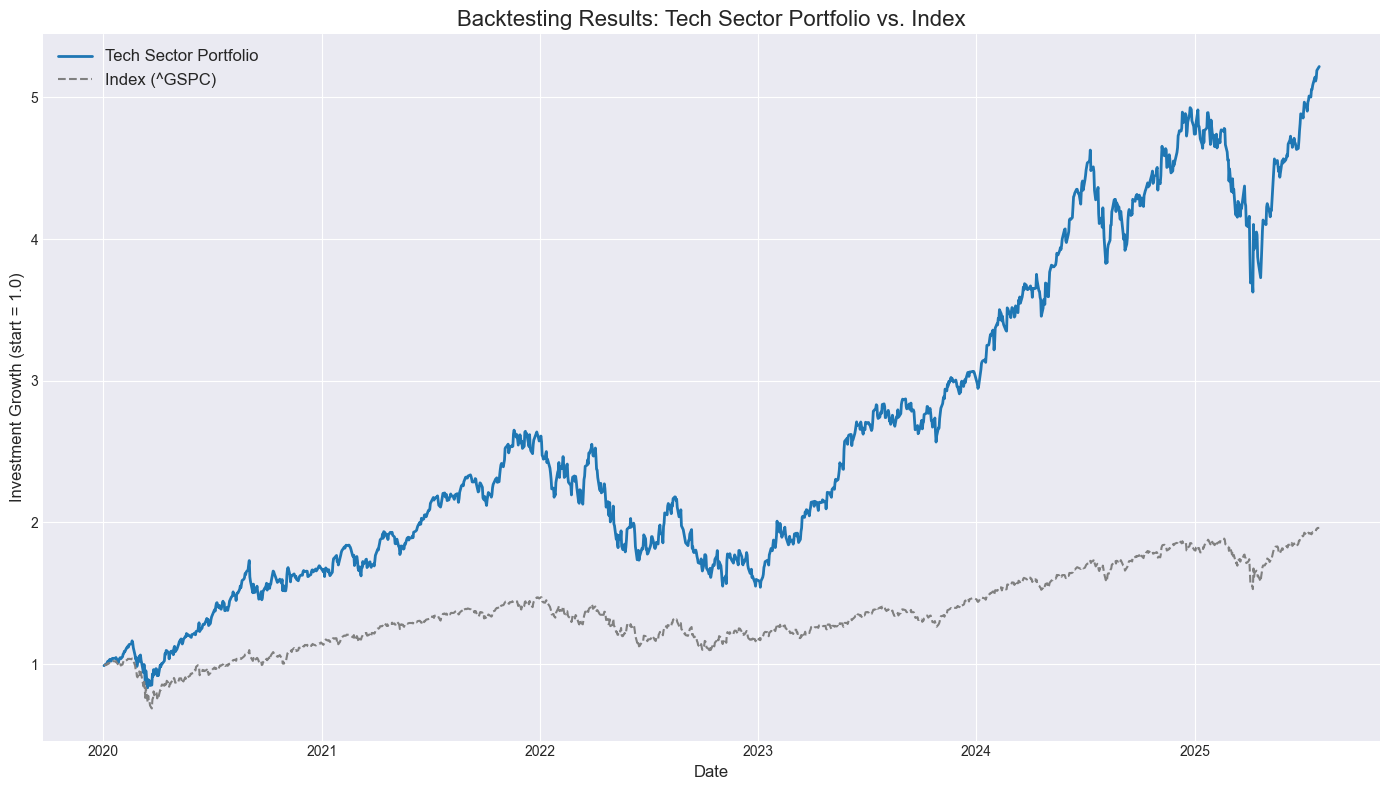

C:\Users\iwtlf\AppData\Local\Temp\ipykernel_22744\3407352938.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data = yf.download(all_tickers, start=start_date, interval='1d')
[*********************100%***********************]  6 of 6 completed


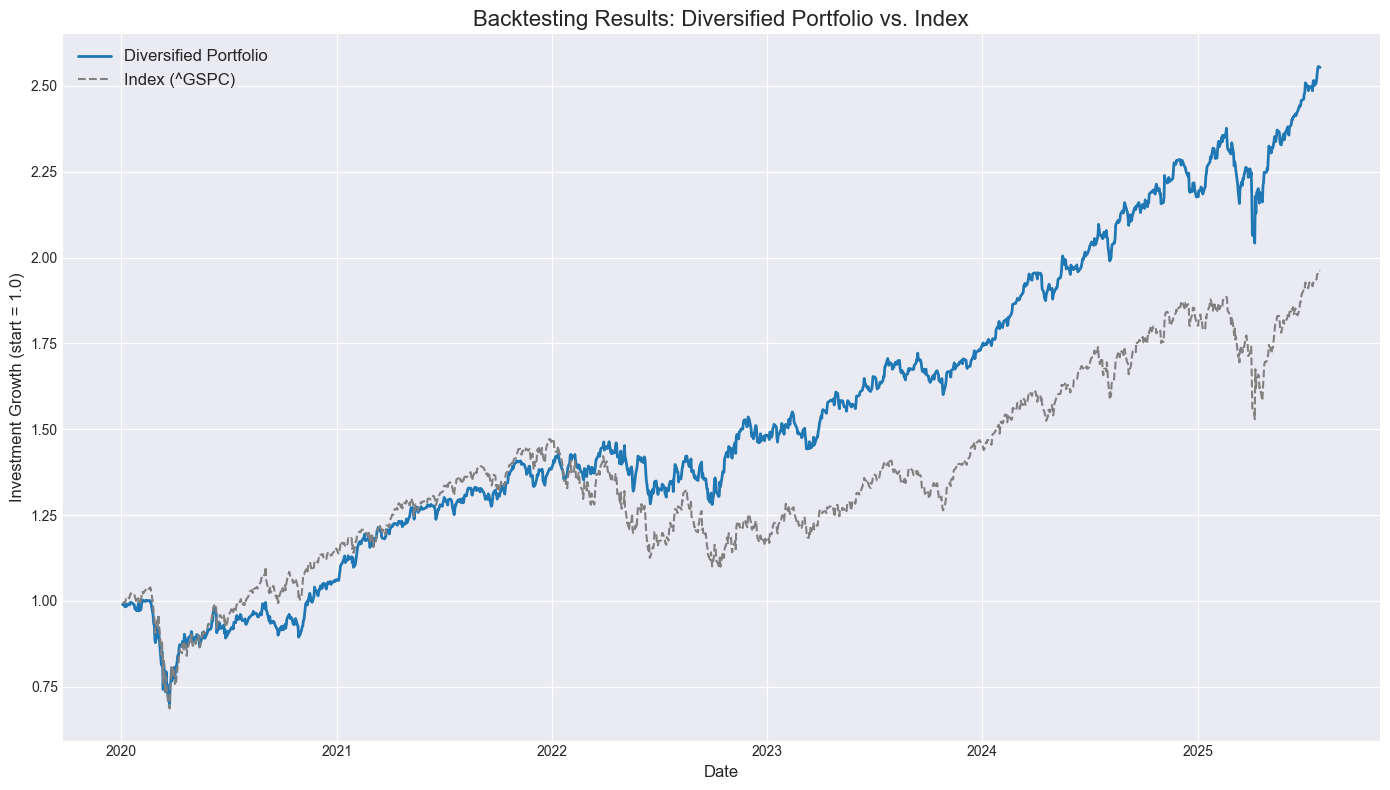

In [24]:
def backtest_comparison(tickers, benchmark='^GSPC', portfolio_name='Portfolio', start_date='2020-01-01'):
    """
    Function to backtest and compare an equally weighted portfolio against a benchmark.

    :param tickers: A list of tickers for the portfolio (e.g., ['AAPL', 'MSFT']).
    :param benchmark: The benchmark ticker (defaults to S&P 500).
    :param portfolio_name: The name of the portfolio for the plot title.
    :param start_date: The start date for the backtest.
    """
    # Final corrected version:
    all_tickers = tickers + [benchmark]

    # 1. Download all data
    full_data = yf.download(all_tickers, start=start_date, interval='1d')

    # 2. Select the 'Close' column, which is now the adjusted price
    data = full_data['Close']
    # 2. Calculate returns
    returns = data.pct_change().dropna()

    # 3. Create an equally weighted portfolio
    # Create equal weights for each ticker in the portfolio
    num_assets = len(tickers)
    weights = np.array([1/num_assets] * num_assets)

    # Calculate portfolio returns
    portfolio_returns = (returns[tickers] * weights).sum(axis=1)
    
    # 4. Calculate cumulative returns
    cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()
    cumulative_benchmark_returns = (1 + returns[benchmark]).cumprod()

    # 5. Plot the graph
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 8))
    
    plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label=portfolio_name, linewidth=2)
    plt.plot(cumulative_benchmark_returns.index, cumulative_benchmark_returns, label=f'Index ({benchmark})', linestyle='--', color='gray')
    
    plt.title(f'Backtesting Results: {portfolio_name} vs. Index', fontsize=16)
    plt.ylabel('Investment Growth (start = 1.0)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('backtesting_results2.png')
    plt.show()

# --- Scenario 1: Tech Sector vs. S&P 500 Index ---
tech_tickers = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN']
backtest_comparison(tech_tickers, portfolio_name='Tech Sector Portfolio')


# --- Scenario 2: Diversified Portfolio (all sectors) vs. S&P 500 Index ---
diversified_tickers = [
    'MSFT',  # Technology
    'JNJ',   # Healthcare
    'JPM',   # Financials
    'XOM',   # Energy
    'WMT'    # Consumer Staples
]
backtest_comparison(diversified_tickers, portfolio_name='Diversified Portfolio')